In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("fertilizer_recommendation.csv")
data.head()

,Temparature,Humidity,Soil Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [3]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [4]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [5]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [6]:
data.columns

Index(['Temparature', 'Humidity', 'Soil Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

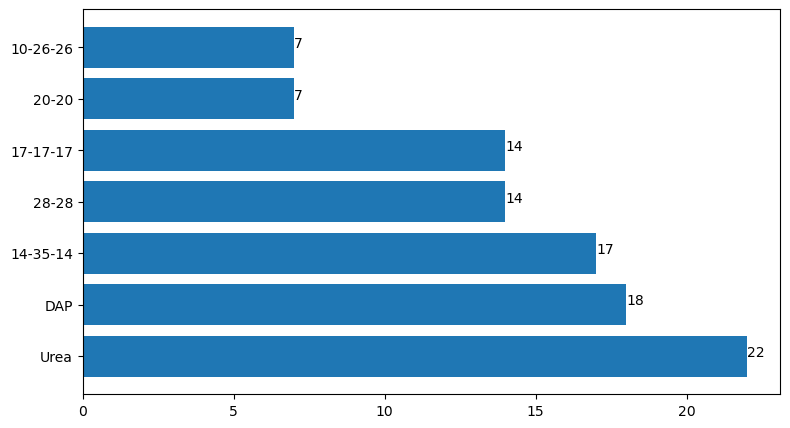

In [7]:
labels = data["Fertilizer Name"].unique()
counts = list(data["Fertilizer Name"].value_counts())

plt.figure(figsize = (9,5))
plt.barh(labels, counts)
  
for index, value in enumerate(counts):
    plt.text(value, index,
             str(value))
plt.show()

In [22]:
continuous_data_cols = ["Temparature", "Humidity", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)

KeyError: "['Moisture'] not in index"

In [ ]:
soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

In [ ]:
crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [ ]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

In [ ]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [ ]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

In [ ]:
data.head()

In [ ]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [ ]:
counter = Counter(y)
counter

In [ ]:
from imblearn.over_sampling import SMOTE
upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

In [ ]:
print(f"Total Data after Upsampling: {len(X)}")

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 3)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

**K-NEAREST NEIGHBORS (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predicted = KNN.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

**SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC = SVC(probability=True)
SVC.fit(X_train,y_train)
predicted = SVC.predict(X_test)
x = metrics.accuracy_score(y_test, predicted)
acc.append(x)
model.append('SVC')
print("SVC Accuracy is: ", x * 100)
print(classification_report(y_test,predicted))

**RANDOM  FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
predicted = RF.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

**XG BOOST CLASSIFIER**

In [ ]:
import xgboost as xgb

In [ ]:
XB = xgb.XGBClassifier(eval_metric='mlogloss')
XB.fit(X_train,y_train)
predicted = XB.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('XG Boost')
print('XG Boost Accuracy is ',x * 100)
print(classification_report(y_test,predicted))

**ACCURACY COMPARISION**

In [ ]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [ ]:
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

**CONCLUSION**

We are using Random Forest Classifier because of its accuracy and precision

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

def fertilizer_recommendation_model(dataset_path):
    # Load the dataset
    data = pd.read_csv(dataset_path)
    
    # Encoding categorical features
    soil_type_label_encoder = LabelEncoder()
    data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

    crop_type_label_encoder = LabelEncoder()
    data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

    fertname_label_encoder = LabelEncoder()
    data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

    # Upsample the minority class
    upsample = SMOTE()
    X, y = upsample.fit_resample(data[data.columns[:-1]], data[data.columns[-1]])

    # Initialize model
    RF = RandomForestClassifier()
    
    # Train model
    RF.fit(X, y)
    
    return RF, soil_type_label_encoder, crop_type_label_encoder, fertname_label_encoder

def predict_fertilizer(model, soil_type_encoder, crop_type_encoder, fertilizer_encoder):
    # Input values from user
    temperature = float(input("Enter Temperature: "))
    humidity = float(input("Enter Humidity: "))
    soil_moisture = float(input("Enter Soil Moisture: "))
    soil_type = input("Enter Soil Type: ")
    crop_type = input("Enter Crop Type: ")
    nitrogen = float(input("Enter Nitrogen: "))
    potassium = float(input("Enter Potassium: "))
    phosphorous = float(input("Enter Phosphorous: "))

    # Create DataFrame for prediction
    input_data = pd.DataFrame({
        "Temparature": [temperature],
        "Humidity": [humidity],
        "Soil Moisture": [soil_moisture],
        "Soil Type": [soil_type_encoder.transform([soil_type])[0]],
        "Crop Type": [crop_type_encoder.transform([crop_type])[0]],
        "Nitrogen": [nitrogen],
        "Potassium": [potassium],
        "Phosphorous": [phosphorous]
    })

    # Make prediction
    predicted_fertilizer_id = model.predict(input_data)[0]
    predicted_fertilizer = fertilizer_encoder.inverse_transform([predicted_fertilizer_id])[0]

    return predicted_fertilizer

# # Example usage:
# model, soil_encoder, crop_encoder, fert_encoder = fertilizer_recommendation_model("fertilizer_recommendation.csv")
# predicted_fertilizer = predict_fertilizer(model, soil_encoder, crop_encoder, fert_encoder)
# print("Recommended Fertilizer:", predicted_fertilizer)


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

def fertilizer_recommendation_model(dataset_path):
    # Load the dataset
    data = pd.read_csv(dataset_path)
    
    # Encoding categorical features
    soil_type_label_encoder = LabelEncoder()
    data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

    crop_type_label_encoder = LabelEncoder()
    data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

    fertname_label_encoder = LabelEncoder()
    data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

    # Upsample the minority class
    upsample = SMOTE()
    X, y = upsample.fit_resample(data[data.columns[:-1]], data[data.columns[-1]])

    # Initialize model
    RF = RandomForestClassifier()
    
    # Train model
    RF.fit(X, y)
    
    return RF, soil_type_label_encoder, crop_type_label_encoder, fertname_label_encoder


def predict_fertilizer(model, soil_type_encoder, crop_type_encoder, fertilizer_encoder):
    # Input values from user
    temperature = float(input("Enter Temperature (in Celsius, 0 to 50): "))
    humidity = float(input("Enter Humidity (in %, 0 to 100): "))
    soil_moisture = float(input("Enter Soil Moisture (in %, 0 to 100): "))
    
    # Display valid soil types
    print("Valid Soil Types:", ", ".join(soil_type_encoder.classes_))

    # Validate soil type input
    while True:
        soil_type = input("Enter Soil Type: ").title()  # Convert input to title case
        if soil_type in soil_type_encoder.classes_:
            break
        else:
            print("Invalid soil type. Please enter a valid soil type from the provided list.")

    # Display valid crop types
    print("Valid Crop Types:", ", ".join(crop_type_encoder.classes_))

    # Validate crop type input
    while True:
        crop_type = input("Enter Crop Type: ").title()  # Convert input to title case
        if crop_type in crop_type_encoder.classes_:
            break
        else:
            print("Invalid crop type. Please enter a valid crop type from the provided list.")

    nitrogen = float(input("Enter Nitrogen (in kg/ha, 0 to 200): "))
    potassium = float(input("Enter Potassium (in kg/ha, 0 to 200): "))
    phosphorous = float(input("Enter Phosphorous (in kg/ha, 0 to 200): "))

    # Create DataFrame for prediction
    input_data = pd.DataFrame({
        "Temparature": [temperature],
        "Humidity": [humidity],
        "Soil Moisture": [soil_moisture],  # Change the feature name to match the one used during model training
        "Soil Type": [soil_type_encoder.transform([soil_type])[0]],
        "Crop Type": [crop_type_encoder.transform([crop_type])[0]],
        "Nitrogen": [nitrogen],
        "Potassium": [potassium],
        "Phosphorous": [phosphorous]
    })

    # Make prediction
    predicted_fertilizer_id = model.predict(input_data)[0]
    predicted_fertilizer = fertilizer_encoder.inverse_transform([predicted_fertilizer_id])[0]

    return predicted_fertilizer

# Load the model and encoders
model, soil_encoder, crop_encoder, fert_encoder = fertilizer_recommendation_model("fertilizer_recommendation.csv")

# Predict fertilizer for user input
predicted_fertilizer = predict_fertilizer(model, soil_encoder, crop_encoder, fert_encoder)
print("Recommended Fertilizer:", predicted_fertilizer)


Enter Temperature (in Celsius, 0 to 50): 25
Enter Humidity (in %, 0 to 100): 21
Enter Soil Moisture (in %, 0 to 100): 45
Valid Soil Types: Black, Clayey, Loamy, Red, Sandy
Enter Soil Type: Red
Valid Crop Types: Barley, Cotton, Ground Nuts, Maize, Millets, Oil seeds, Paddy, Pulses, Sugarcane, Tobacco, Wheat
Enter Crop Type: Nuts
Invalid crop type. Please enter a valid crop type from the provided list.
Enter Crop Type: Paddy
Enter Nitrogen (in kg/ha, 0 to 200): 25
Enter Potassium (in kg/ha, 0 to 200): 0
Enter Phosphorous (in kg/ha, 0 to 200): 21
Recommended Fertilizer: 28-28
